## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

C:\Users\Anjali Abhi\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

## Exploratory data analysis

In [4]:
# Importing the dataset
#df = pd.read_csv('/content/drive/MyDrive/Credit_card_fraud_detection/creditcard.csv')
#df = pd.read_csv('C:/Users/Anjali Abhi/Downloads/creditcard.csv')
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print (normal_share, fraud_share)

99.82725143693798 0.1727485630620034


### We can see that the dataset is highly imbalanced. Only 1.72% of the records are fraud

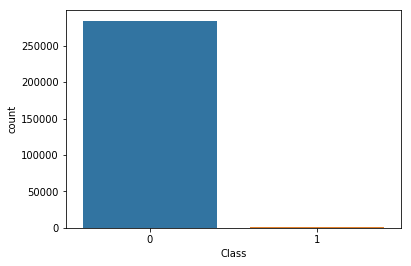

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(df.Class)
plt.show()


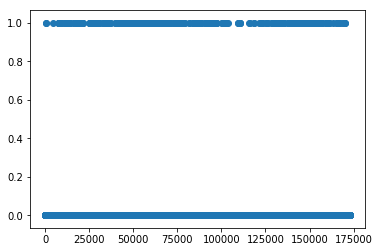

In [8]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(x='Time',y='Class', data=df)
plt.show()

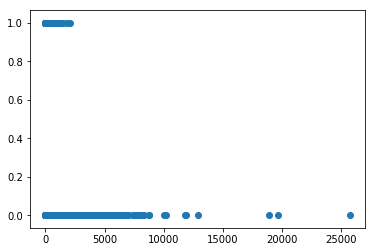

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(x='Amount',y='Class', data=df)
plt.show()

In [10]:
# Drop unnecessary columns
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Splitting the data into train & test data

In [12]:
y= df['Class'] #class variable
X=df.drop('Class',axis=1)

In [13]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3, random_state=100)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 30), (199364,), (85443, 30), (85443,))

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Plotting the distribution of a variable

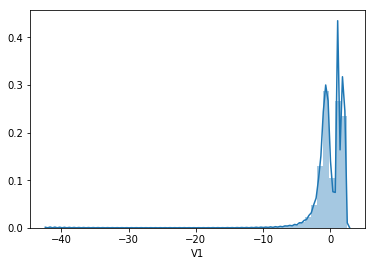

In [16]:
# plot the histogram of a variable from the dataset to see the skewness
sns.distplot(X_train.V1)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt=preprocessing.PowerTransformer(copy=False)
print(pt.fit(X_train))
print(pt.lambdas_)

print(pt.transform(X_train))

PowerTransformer(copy=False)
[ 0.76976975  1.48350725  1.21817284  1.33957212  0.81937559  1.00454309
  0.71937394  1.03330195  1.2859795   0.84860641  0.8601731   0.86902077
  1.54044082  0.97188566  1.25846625  1.17974831  1.27860328  1.15372052
  1.07184799  0.96353787  1.00077851  0.89598579  1.07717683  1.07461757
  1.42435126  1.19082672  0.51978619  1.17565999  0.89545987 -0.04508829]
[[-1.9777624   0.59847004 -0.07663472 ... -0.18048149 -0.02782542
  -1.8534669 ]
 [ 0.73006239  1.44556451 -0.13437333 ... -0.20605581 -0.22088604
  -1.44666202]
 [-0.25474881  0.84304949 -0.98741143 ...  0.09939728  0.10789915
   0.70649056]
 ...
 [ 1.24267621 -1.08183925 -0.41771323 ... -0.61867143  0.23464063
   1.89544803]
 [ 0.90612916 -0.46037622  0.58231303 ... -0.73313856  0.06488076
  -1.268556  ]
 [-0.97358048  0.16855185 -0.62610289 ...  0.1228928   0.23395345
   1.36337636]]


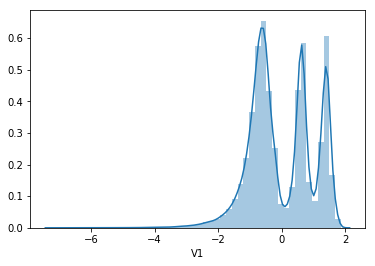

In [19]:
# plot the histogram of a variable from the dataset again to see the result 
sns.distplot(X_train.V1)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [20]:
params_knn = { 
    'n_neighbors': range(1, 32, 1)
 }
params_rf = { 
    'n_estimators': [200, 500],
    'max_depth' : [20,30],
    'min_samples_leaf' : [ 100, 200],
    'min_samples_split': [100,200]
 }
params_xgb = {
    'learning_rate': [0.01, 0.025, 0.1],
    'n_estimators': [50, 210, 300],
    'max_depth': [3, 5,  9,  15,  25],
    'random_state': [42],
    'verbosity': [0]
}
params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.08, 0.09, 0.1, 0.11, 0.12],
    'random_state': [78]
}

params_dt={"splitter":["best","random"],
            "max_depth" : [3,5,9,12],
           "min_samples_leaf":[2,5,6,8,10],
           "min_weight_fraction_leaf":[0.1,0.3,0.5,0.7,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,50,70] }

params_svm = {'C': [0.1, 1, 10,  1000],
              'gamma': [1, 0.1, 0.01, 0.0001],
              'kernel': ['rbf']}          

In [21]:
kf = KFold(n_splits = 5)

Logistic Regression Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [23]:
clf_lr = LogisticRegression()
rand_lr = RandomizedSearchCV(clf_lr, params_lr, scoring = 'f1', cv=kf)
rand_lr.fit(X_train, y_train)

print('LR Best estimator:')
print(rand_lr.best_estimator_)
print('LR Best score:')
print(rand_lr.best_score_ )

LR Best estimator:
LogisticRegression(C=0.12, random_state=78)
LR Best score:
0.7728069759801878


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

RandomForestClassifier Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [24]:
clf_rf = RandomForestClassifier()
rand_rf = RandomizedSearchCV(clf_rf, params_rf, scoring = 'f1', cv=kf) 
rand_rf.fit(X_train, y_train)

print('RandomForest Best estimator:')
print(rand_rf.best_estimator_)
print('RandomForest Best score:')
print(rand_rf.best_score_ )


RandomForest Best estimator:
RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42)
RandomForest Best score:
0.862538503794875


Decision Tree Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [25]:
clf_dt = DecisionTreeClassifier()
rand_dt = RandomizedSearchCV(clf_dt, params_dt, scoring = 'f1', cv=kf) 
rand_dt.fit(X_train, y_train)

print('Decision Tree Best estimator:')
print(rand_dt.best_estimator_)
print('Decision Tree Best score:')
print(rand_dt.best_score_ )

Decision Tree Best estimator:
DecisionTreeClassifier(max_depth=12, max_features='sqrt', max_leaf_nodes=30,
                       min_samples_leaf=4, min_weight_fraction_leaf=0.5,
                       splitter='random')
Decision Tree Best score:
0.0


XGB Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [23]:
clf_xgb = XGBClassifier()
rand_xgb = RandomizedSearchCV(clf_xgb, params_xgb, scoring = 'f1', cv=kf) 
rand_xgb.fit(X_train, y_train)

print('XGB Best estimator:')
print(rand_xgb.best_estimator_)
print('XGB Best score:')
print(rand_xgb.best_score_ )

XGB Best estimator:
XGBClassifier(colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5,
              n_estimators=210, random_state=42, subsample=1.0)
XGB Best score:
0.8744316029329905


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [27]:
# function to display scores for classifier clf, with training data x_tr, y_tr and test data
# x_te, y_te
def scores(clf, x_tr, y_tr, x_te, y_te):
    clf.fit(x_tr, y_tr)
    pred = clf.predict(x_te)
    print('Precision:',precision_score(y_te, pred))
    print('Recall:',recall_score(y_te, pred))
    print('F1:',f1_score(y_te, pred))
    print('Confusion Matrix (tn, fp, fn, tp):',confusion_matrix(y_te, pred).ravel())

In [25]:
# best LR classifier after hyperparameter tuning based on F1 score
b_lr = LogisticRegression(C=0.12, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=78, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
scores(b_lr, X_train, y_train, X_test, y_test)

Precision: 0.0
Recall: 0.0
F1: 0.0
Confusion Matrix (tn, fp, fn, tp): [85301     0   142     0]


In [27]:
# best RF classifier after hyperparameter tuning based on F1 score
b_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False) 
scores(b_rf, X_train, y_train, X_test, y_test)

Precision: 0.7851851851851852
Recall: 0.7464788732394366
F1: 0.7653429602888087
Confusion Matrix (tn, fp, fn, tp): [85272    29    36   106]


In [35]:
# best DT classifier after hyperparameter tuning based on F1 score
b_dt = DecisionTreeClassifier( class_weight=None, criterion='gini',
            max_depth=12, max_features='sqrt', max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.5, random_state=42, splitter='random') 
scores(b_dt, X_train, y_train, X_test, y_test)

Precision: 0.0
Recall: 0.0
F1: 0.0
Confusion Matrix (tn, fp, fn, tp): [85301     0   142     0]


In [37]:
# best XGB classifier after hyperparameter tuning based on F1 score
b_xgb1 = XGBClassifier(colsample_bytree=0.6, gamma=0.5, learning_rate=0.05, max_depth=5,
              n_estimators=210, random_state=42, subsample=1.0)
scores(b_xgb1, X_train, y_train, X_test, y_test)

Precision: 0.8043478260869565
Recall: 0.7816901408450704
F1: 0.7928571428571428
Confusion Matrix (tn, fp, fn, tp): [85274    27    31   111]


### We can see that XGBoost has preformed the best followed by RandomForest. 

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 13


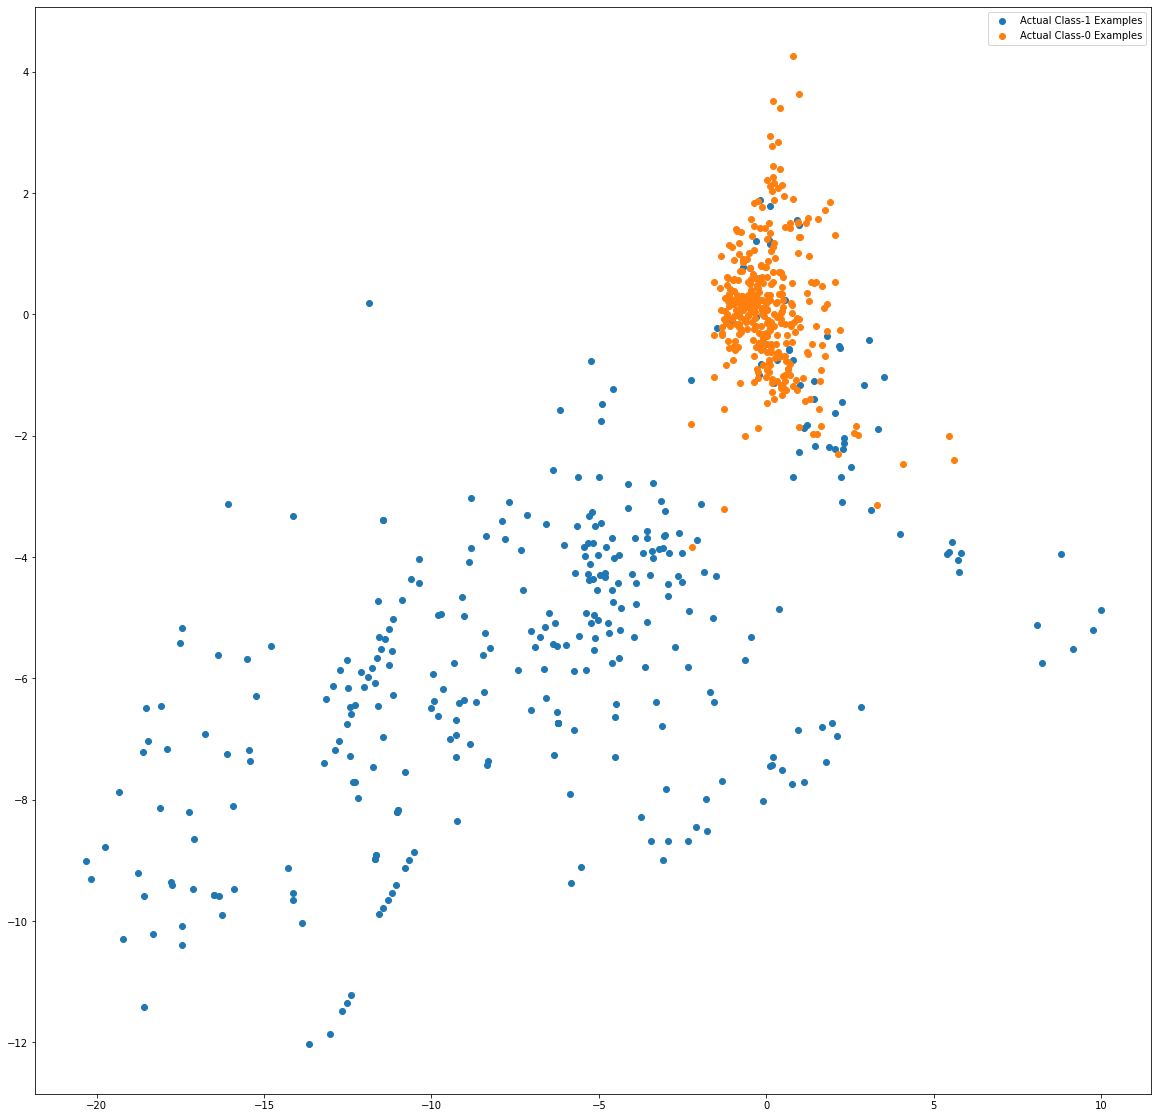

In [39]:
clf=b_xgb1
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

### Random Oversampling

In [17]:
X_train.shape, y_train.shape

((199364, 30), (199364,))

In [18]:
from imblearn import over_sampling #- import the packages
ro = over_sampling.RandomOverSampler(random_state=0)
X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)

X_train_ro.shape, y_train_ro.shape

((398028, 30), (398028,))

Random Oversampling - Logistic Regression Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [45]:
clf_lr = LogisticRegression()
rand_lr = RandomizedSearchCV(clf_lr, params_lr, scoring = 'f1', cv=kf)
rand_lr.fit(X_train_ro, y_train_ro)

print('LR Best estimator:')
print(rand_lr.best_estimator_)
print('LR Best score:')
print(rand_lr.best_score_ )

LR Best estimator:
LogisticRegression(C=0.08, random_state=78)
LR Best score:
0.6040002233729423


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

Random Oversampling - RandomForestClassifier Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [46]:
clf_rf = RandomForestClassifier()
rand_rf = RandomizedSearchCV(clf_rf, params_rf, scoring = 'f1', cv=kf) 
rand_rf.fit(X_train_ro, y_train_ro)

print('RandomForest Best estimator:')
print(rand_rf.best_estimator_)
print('RandomForest Best score:')
print(rand_rf.best_score_ )

RandomForest Best estimator:
RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=200,
                       random_state=42)
RandomForest Best score:
0.9760651537009547


Random Oversampling - Decision Tree Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [48]:
clf_dt = DecisionTreeClassifier()
rand_dt = RandomizedSearchCV(clf_dt, params_dt, scoring = 'f1', cv=kf) 
rand_dt.fit(X_train_ro, y_train_ro)

print('Decision Tree Best estimator:')
print(rand_dt.best_estimator_)
print('Decision Tree Best score:')
print(rand_dt.best_score_ )

Decision Tree Best estimator:
DecisionTreeClassifier(max_depth=5, max_leaf_nodes=70, min_samples_leaf=2,
                       min_weight_fraction_leaf=0.3)
Decision Tree Best score:
0.597781041536407


Random Oversampling - XGB Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [28]:
# Define the grid of hyperparameters to search
params_xgb_test = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 10, 100]
    }

In [37]:
clf_xgb = XGBClassifier()
rand_xgb = RandomizedSearchCV(clf_xgb, params_xgb_test, scoring = 'f1', cv=kf) 
rand_xgb.fit(X_train_ro, y_train_ro)

print('XGB Best estimator:')
print(rand_xgb.best_estimator_)
print('XGB Best score:')
print(rand_xgb.best_score_ )

XGB Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGB Best score:
0.9834442876863893


In [37]:
#!pip upgrade numpy
!pip install --upgrade --user pandas

In [24]:
!pip install --upgrade --user imblearn

     |████████████████████████████████| 199 kB 3.9 MB/s            
     |████████████████████████████████| 26.7 MB 19.6 MB/s            
     |████████████████████████████████| 306 kB 49.8 MB/s            
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [30]:
!pip freeze

absl-py==1.0.0
anyio==2.2.0
argon2-cffi==20.1.0
astunparse==1.6.3
async-generator==1.10
attrs==19.3.0
Babel==2.9.0
backcall==0.2.0
bcrypt==3.2.0
bleach==3.3.0
blinker==1.4
cachetools==4.2.2
certifi==2019.11.28
cffi==1.14.5
chardet==3.0.4
Click==7.0
cloud-init==21.2
colorama==0.4.3
configobj==5.0.6
cryptography==2.8
dbus-python==1.2.16
decorator==5.0.7
defusedxml==0.7.1
deprecation==2.1.0
distro==1.4.0
distro-info===0.23ubuntu1
entrypoints==0.3
filelock==3.3.0
fire==0.4.0
Flask==1.1.1
flatbuffers==2.0
gast==0.4.0
gdown==4.0.2
gevent==1.4.0
google-api-python-client==1.7.4
google-auth==1.32.0
google-auth-httplib2==0.1.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
greenlet==0.4.15
grpcio==1.42.0
gunicorn==20.0.4
h5py==3.6.0
httplib2==0.19.1
idna==2.8
imbalanced-learn==0.9.0
imblearn==0.0
importlib-metadata==4.8.2
ipykernel==5.5.3
ipython==7.22.0
ipython-genutils==0.2.0
ipywidgets==7.6.3
itsdangerous==1.1.0
jedi==0.18.0
Jinja2==2.10.1
joblib==1.1.0
json5==0.9.5
jsonpatch==1.22
jsonpoint

In [25]:
!pip install --upgrade --user xgboost

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [26]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.1 MB 4.2 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


199364


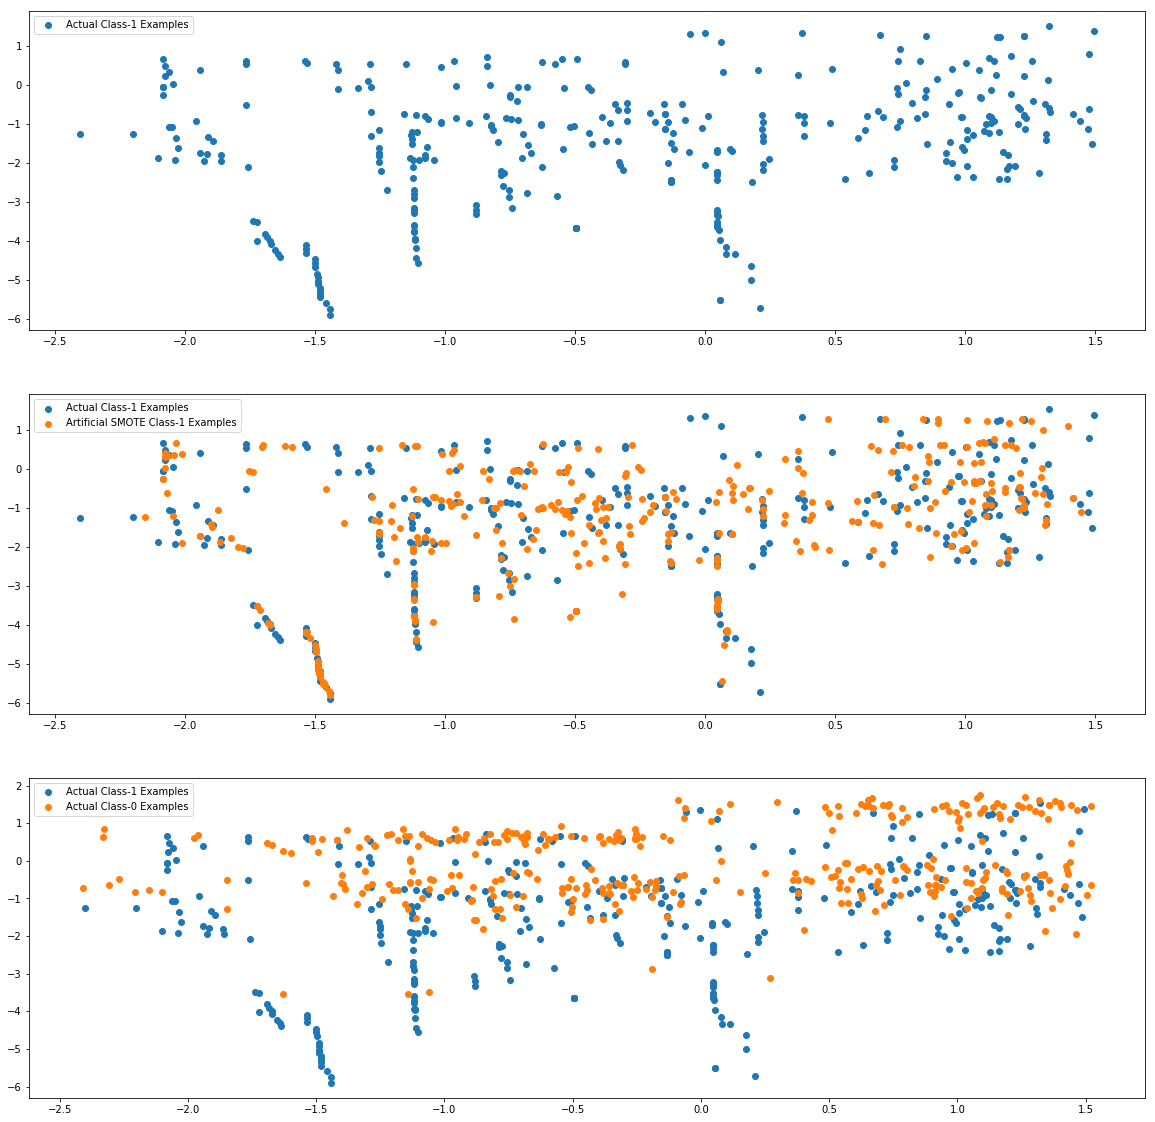

In [31]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

print(X_train.shape[0])
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1], label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying SMOTE 

In [28]:
X_train_smote.shape, y_train_smote.shape

((398028, 30), (398028,))

SMOTE - Logistic Regression Hyperparameter tuning using RandomizedSearchCV with 5-fold


In [43]:

clf_lr = LogisticRegression()
sm_lr = RandomizedSearchCV(clf_lr, params_lr, scoring = 'f1', cv=kf)
sm_lr.fit(X_train_smote, y_train_smote)

print('LR Best estimator:')
print(sm_lr.best_estimator_)
print('LR Best score:')
print(sm_lr.best_score_ )

LR Best estimator:
LogisticRegression(C=0.1, random_state=78)
LR Best score:
0.6020021065739121


##### Build models on other algorithms to see the better performing on SMOTE

SMOTE- RandomForestClassifier Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [32]:
clf_rf = RandomForestClassifier()
sm_rf = RandomizedSearchCV(clf_rf, params_rf, scoring = 'f1', cv=kf) 
sm_rf.fit(X_train_smote, y_train_smote)

print('RandomForest Best estimator:')
print(sm_rf.best_estimator_)
print('RandomForest Best score:')
print(sm_rf.best_score_ )


RandomForest Best estimator:
RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=200, random_state=42)
RandomForest Best score:
0.7836366504228292


SMOTE- Decision Tree Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [31]:
clf_dt = DecisionTreeClassifier()
sm_dt = RandomizedSearchCV(clf_dt, params_dt, scoring = 'f1', cv=kf) 
sm_dt.fit(X_train_smote, y_train_smote)

print('Decision Tree Best estimator:')
print(sm_dt.best_estimator_)
print('Decision Tree Best score:')
print(sm_dt.best_score_ )

Decision Tree Best estimator:
DecisionTreeClassifier(max_depth=12, max_leaf_nodes=50, min_samples_leaf=6,
                       min_weight_fraction_leaf=0.1, splitter='random')
Decision Tree Best score:
0.5738777166840888


SMOTE - XGB Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [30]:
clf_xgb = XGBClassifier()
sm_xgb = RandomizedSearchCV(clf_xgb, params_xgb_test, scoring = 'f1', cv=kf) 
sm_xgb.fit(X_train_smote, y_train_smote)

print('XGB Best estimator:')
print(sm_xgb.best_estimator_)
print('XGB Best score:')
print(sm_xgb.best_score_ )

[05:59:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:02:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:04:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Print the class distribution after applying ADASYN

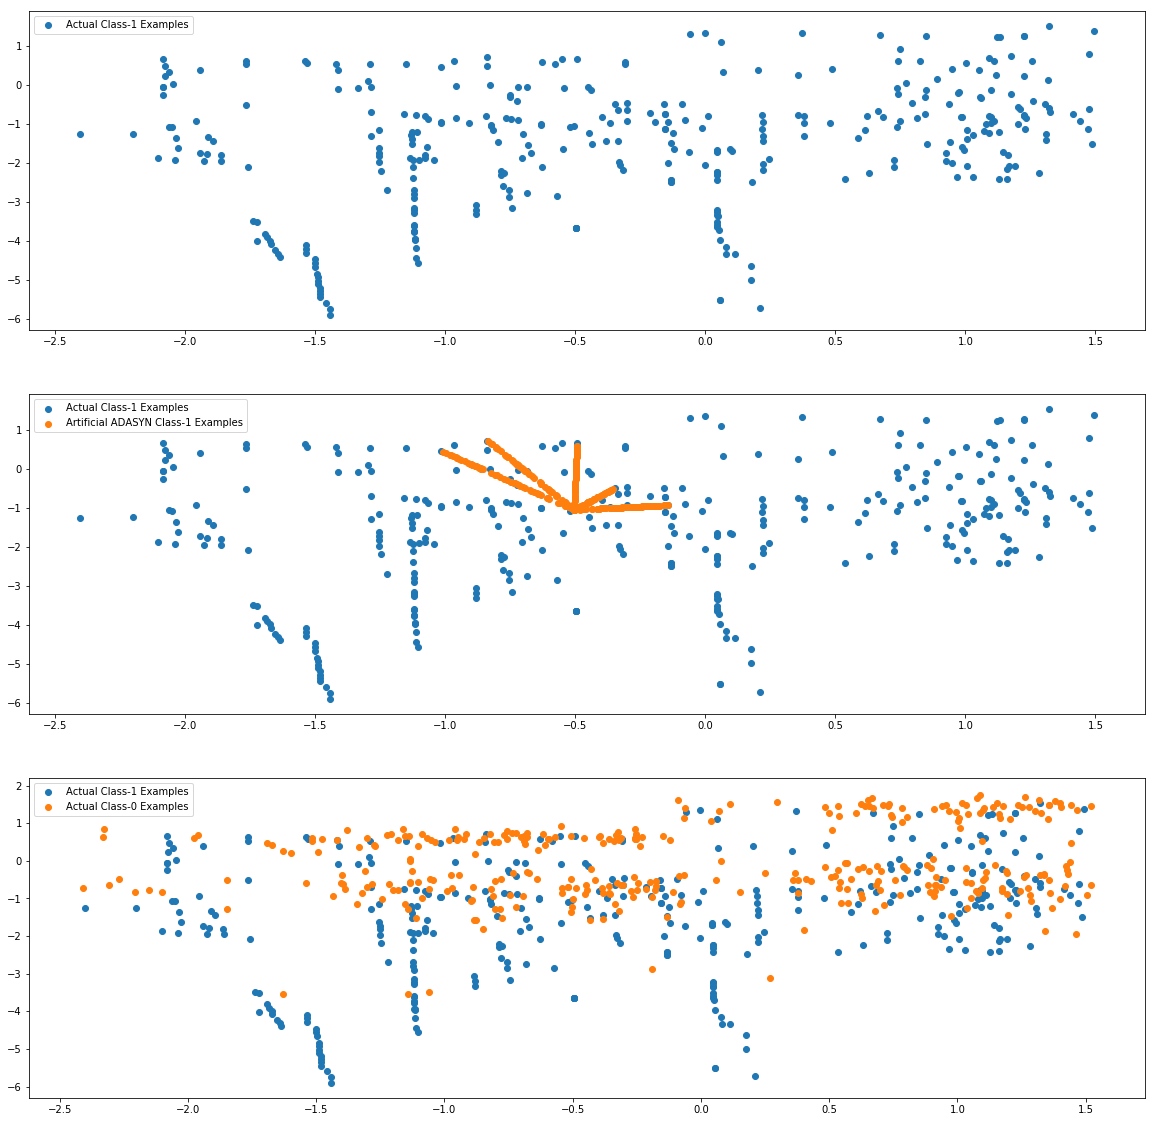

In [32]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [27]:
X_train_adasyn.shape, y_train_adasyn.shape

((398062, 30), (398062,))

Adasyn - Logistic Regression Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [33]:
clf_lr = LogisticRegression()
adasyn_lr = RandomizedSearchCV(clf_lr, params_lr, scoring = 'f1', cv=kf)
adasyn_lr.fit(X_train_adasyn, y_train_adasyn)

print('LR Best estimator:')
print(adasyn_lr.best_estimator_)
print('LR Best score:')
print(adasyn_lr.best_score_ )

LR Best estimator:
LogisticRegression(C=0.12, random_state=78)
LR Best score:
0.5309310766515989


##### Build models on other algorithms to see the better performing on ADASYN

Adasyn  - RandomForestClassifier Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [ ]:
clf_rf = RandomForestClassifier()
adasyn_rf = RandomizedSearchCV(clf_rf, params_rf, scoring = 'f1', cv=kf) 
adasyn_rf.fit(X_train_adasyn, y_train_adasyn)

print('RandomForest Best estimator:')
print(adasyn_rf.best_estimator_)
print('RandomForest Best score:')
print(adasyn_rf.best_score_ )

Adasyn - Decision Tree Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [28]:
clf_dt = DecisionTreeClassifier()
adasyn_dt = RandomizedSearchCV(clf_dt, params_dt, scoring = 'f1', cv=kf) 
adasyn_dt.fit(X_train_adasyn, y_train_adasyn)

print('Decision Tree Best estimator:')
print(adasyn_dt.best_estimator_)
print('Decision Tree Best score:')
print(adasyn_dt.best_score_ )

Decision Tree Best estimator:
DecisionTreeClassifier(max_depth=9, max_features='auto', max_leaf_nodes=10,
                       min_samples_leaf=10, min_weight_fraction_leaf=0.5)
Decision Tree Best score:
0.5165279153355178


Adasyn - XGB Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [31]:
clf_xgb = XGBClassifier()
adasyn_xgb = RandomizedSearchCV(clf_xgb, params_xgb_test, scoring = 'f1', cv=kf) 
adasyn_xgb.fit(X_train_adasyn, y_train_adasyn)

print('XGB Best estimator:')
print(adasyn_xgb.best_estimator_)
print('XGB Best score:')
print(adasyn_xgb.best_score_ )

[02:03:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:05:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:07:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:09:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Performing the best oversampling method on X_train & y_train

In [55]:
# We can see that both RandomForestClassifier and XGBOOST have got a best score of around 0.98 with Random Oversampling. 
# Hence, predicting on the test set using both of these algorithns

In [28]:
# best RF classifier after hyperparameter tuning based on F1 score
b_rf = RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=200,
                       random_state=42)
scores(b_rf, X_train, y_train, X_test, y_test)

Precision: 0.7851851851851852
Recall: 0.7464788732394366
F1: 0.7653429602888087
Confusion Matrix (tn, fp, fn, tp): [85272    29    36   106]


In [48]:
# perform the XGBoost on X_train & y_train

clf= b_xgb1 #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train) # fit on the balanced dataset
y_pred = clf.predict(X_test)
print('Precision:',precision_score(y_test, y_pred))
print('Recall:',recall_score(y_test, y_pred))
print('F1:',f1_score(y_test, y_pred)) --> #print the evaluation score on the X_test by choosing the best evaluation metric
print('Confusion Matrix (tn, fp, fn, tp):',confusion_matrix(y_test, y_pred).ravel())

Precision: 0.7671232876712328
Recall: 0.7887323943661971
F1: 0.7777777777777778
Confusion Matrix (tn, fp, fn, tp): [85267    34    30   112]


### We can notice that Random Oversampling is giving us the rest results out of all 3 Oversampling techniques

### We can see that XGBoost with Random Oversampling is giving us better Recall value i.e. the model correctly identifies 79% credit card frauds

### Print the important features of the best model to understand the dataset

Top var = 18
2nd Top var = 15
3rd Top var = 11


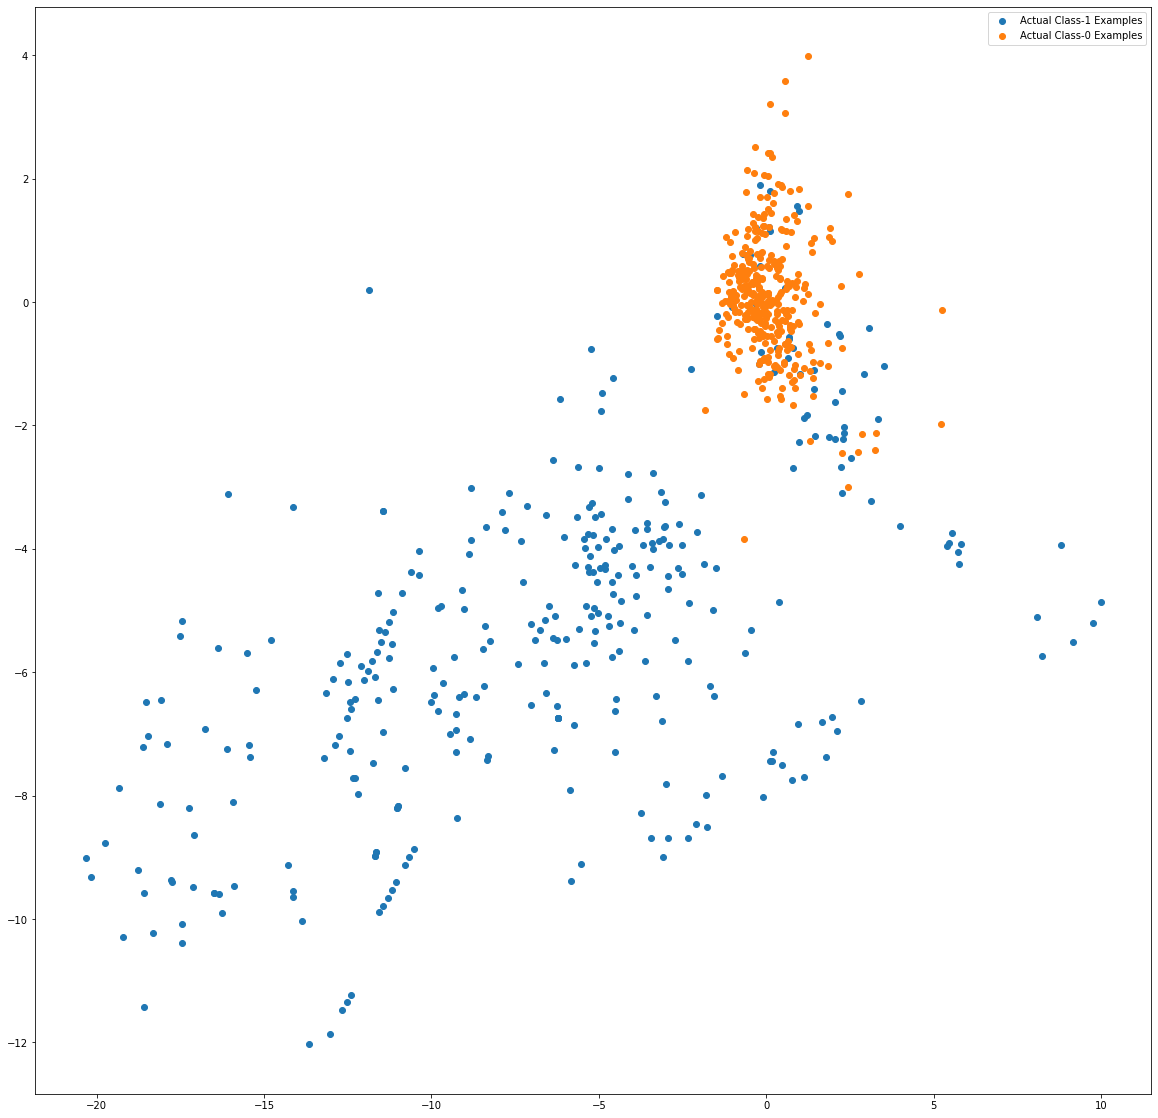

In [32]:
clf = b_xgb1
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [59]:
print('Train auc =', roc_auc_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate=False)
threshold = thresholds[np.argmax(tpr-fpr)]
print('FPR is' ,fpr)
print('TPR is' ,tpr)
print('Threshold is' ,threshold)

Train auc = 0.8941669029192565
FPR is [0.00000000e+00 3.98588528e-04 1.00000000e+00]
TPR is [0.         0.78873239 1.        ]
Threshold is 1
